# Activation Function
- In neural network, each node can represent any kind of function with multiple inputs and single output. For biological model of each neuron, the output represent whether the signal reached to the next node. In other word, output of each neuron will be strictly binary with probability of passing through the synapsis.
- However, actual machine learning perceptrons does not have to follow this pattern: because of some calculation complexity and floating point issues, we can expand the notion of 'probability' to simply a comparable value.
- Heaviside function gives step-like determination to the result of each neuron. However, this abrupt change does not provide a good training result on overlapping data, which is why it is more favorable to use smooth change functions.
- Following three functions are used for next examples: Sigmoid, Hyperbolic Tangent, and Rectified Linear Unit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

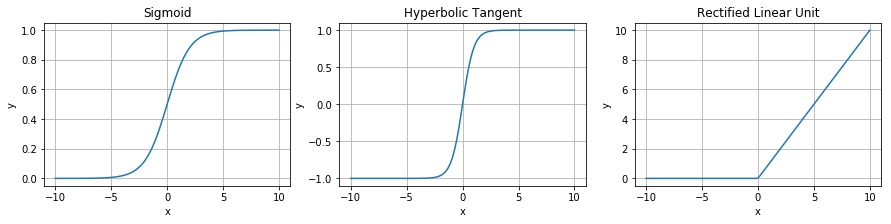

In [2]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
htangent = lambda x: np.tanh(x)
relu = lambda x: np.maximum(np.zeros(len(x)),x)
activation_function = [sigmoid, htangent, relu]
ptitle = ['Sigmoid', 'Hyperbolic Tangent', 'Rectified Linear Unit']

ncol, nrow = 3, 1
fig = plt.figure(figsize=(5*ncol,3*nrow))
linex=np.linspace(-10,10,100)
for i in range(3):
    subplot = fig.add_subplot(nrow,ncol,i+1)
    subplot.set_title(ptitle[i])
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')
    liney = activation_function[i](linex)
    subplot.plot(linex, liney)
    subplot.grid()

- Sigmod : It ranges from (0,1), and it is reasonably smooth transition. This function can represent the probablity, which ranges from 0 to 100.
- Hyperbolic Tangent: It ranges from (-1,1), and the shape is similar to the sigmoid function.
- Rectified Linear Unit(relu): This function provides same input to output signal if the signal is positive value. This is 'limiter' that cuts any negative signals.
    - This type of activation function is useful if the problem is only asking to 'compare' the classification, instead of finding the actual probability.

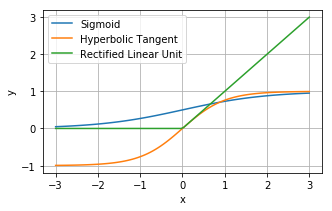

In [3]:
ncol, nrow = 1, 1
fig = plt.figure(figsize=(5*ncol,3*nrow))
linex=np.linspace(-3,3,100)
subplot = fig.add_subplot(nrow,ncol,1)
subplot.set_xlabel('x')
subplot.set_ylabel('y')
subplot.grid()
for i in range(3):
    liney = activation_function[i](linex)
    subplot.plot(linex, liney,label=ptitle[i])
subplot.legend(loc='best')

# Softmax Function - Multinomial Classification

Linear regression model can be understood as a binary classification model. In general case, it divides a dataset plane into two sections, each sections representing a class. If there are more than two classes to distinguish, we can stack multiple sigmoid function. Mathematically, this idea can be expressed in single softmax function.

## Revisite Sigmoid Function
Sigmoid function has following form:

$$
\sigma(x) = \frac{x}{1+e^{-x}}
$$

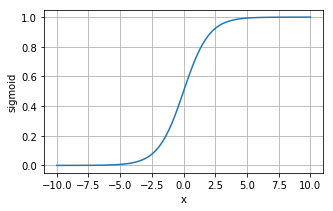

In [4]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(5,3))
linex=np.linspace(-10,10,100)
plt.plot(linex, sigmoid(linex))
plt.xlabel('x')
plt.ylabel('sigmoid')
plt.grid('on')

Sigmoid function essentially squeeze the range from $-\infty$ to $\infty$ to the range between 0 and 1. In binary classification, x is the distance from the line(curve) f(x), and the result gives probability of the data belong to the category.

## Sigmoid Function

Softmax function has following form:
- wikipedia

$$
{\displaystyle \sigma :\mathbb {R} ^{K}\to [0,1]^{K}} \\\
{\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}} \quad\text{for}\quad j = 1, …, K.
$$

Notice, sum of the softmax of individual candidate is 1. The input z is a vector, and the result essentially remap, just like sigmoid, every elements to the range between 0 and 1.

In [5]:
# define softmax:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

x = np.array([3,4,5,6])
print(softmax(x))
print(sum(softmax(x)))

[0.0320586  0.08714432 0.23688282 0.64391426]
1.0
